### We can use the `cohorts` module to filter down to a cohort of ICU stays

In [1]:
from chatto_transform.sessions.mimic import cohorts

### We start by making a new `Cohort`.

In [2]:
my_cohort = cohorts.Cohort()

### Next we apply various filters using widgets.

### We can start by filtering medications. In this example, select *Acetaminophen-IV* from the select box, then click *Execute*.

In [7]:
my_cohort.filter_medications()

### Now let's filter down to ICU stays that had Sodium-related labs.

### Click the select box and begin by typing the first few letters of "Sodium". Now hold down Shift while clicking all of the *Sodium* lab events in the list.

### Then click *Execute* to lock it in.

In [6]:
my_cohort.filter_labevents()

### We can filter down to ICU stays where there was a diagnoses or procedure with certain ICD9 codes.

### In the text field, type in `428%` and press Enter. Then click *Execute*.

#### The `%` is a wildcard - it will match any ICD9 code starting with 428- in this case it has to do with heart failure.

In [4]:
my_cohort.filter_icd9_codes()

### Finally, let's filter down to ICU stays where the patient died within 12 months of hospital admission.

### Click the "Died with 12 months of hospital admission" radio button, then click *Execute*.

In [5]:
my_cohort.filter_death()

### Now that we have selected various filters for our cohort, let's get some summary info about it.

In [8]:
my_cohort.summary()

,summary
icustays,3
hadms,2
patients,2
icustay_deaths,0
hadm_deaths,2
12mo_deaths,3
first_careunits,2
last_careunits,2
avg_icu_los,1 days 18:29:16.333333
avg_hadm_los,20 days 04:14:00


### We can get all the `icustay_id`'s for our cohort...

In [9]:
my_cohort.icustay_ids()

,icustay_ids
0,221944
1,221039
2,255715


### ...Or load all the data right here and get to analyzing.

In [10]:
df = my_cohort.load()

In [11]:
df

,row_id,subject_id,hadm_id,icustay_id,dbsource,...,first_wardid,last_wardid,intime,outtime,los
38397,44164,48453,145436,221944,metavision,...,52,52,2200-11-01 19:51:43,2200-11-02 13:24:23,0.7310
51870,56232,83976,126268,221039,metavision,...,57,57,2102-01-19 10:26:27,2102-01-21 19:57:06,2.3963
51871,56233,83976,126268,255715,metavision,...,52,52,2102-01-24 21:37:50,2102-01-27 02:02:20,2.1837


### I dunno, let's look at a plot of our cohort's lengths of stay in days

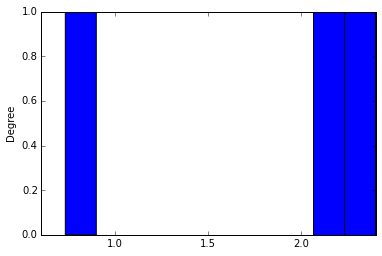

In [12]:
%matplotlib inline
df['los'].plot(kind='hist')